**1. 라이브러리 설치**

   라이브러리: 특정 기능을 하는 여러 모듈을 모아놓은 패키지의 집합
   nltk: 자연어를 파이썬 환경에서 처리하기 위한 플랫폼.
   https://www.nltk.org/

   pymystem: 얀덱스에서 개발한 러시아어 형태소 분석기. 표제어 추출(lemmatization)을 지원. https://yandex.ru/dev/mystem/

   pymorphy: 형태소 분석기로 러시아어와 우크라이나어를 지원. https://pymorphy2.readthedocs.io/en/stable/

   nltk에서는 자연어 처리를 위한 여러 도구를 지원한다. 그 중에서 불용어 처리를 도와주는 ‘stopwords’와 토큰화를 위한 ‘punkt’를 설치해준다.  

In [ ]:
!pip install nltk
!pip install pymystem3
!pip install pymorphy2
import nltk
nltk.download('stopwords')
nltk.download('punkt')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 109.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=356a26f8cc36eae7e5fc1e2e7222aa82d852980b628c95be695c3d35591a3815
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**2. 텍스트 파일 불러오기**

https://wortschatz.uni-leipzig.de/en/download/Russian

utf-8로 인코딩 되어있기 때문에 encoding = utf-8 로 선언



In [ ]:
with open("rus_news_2021_10K-sentences.txt", encoding='utf-8' ) as f:
    text = f.read().replace('\n', ' ')

print('유형:',type(text))
print('길이:',len(text))
print('샘플:',text[:600])

유형: <class 'str'>
길이: 1104150
샘플: 1	"11 700 человек забронировали себе время на вакцинацию к часу дня. 2	«15 декабря после двух часов дня беременная женщина вызвала такси в больницу из Копейска в Челябинск. 3	«19 июля Президент Касым-Жомарт Токаев проведет рабочее совещание с участием Премьер-министра, руководителей ведомств, акимов городов и областей по санитарно-эпидемиологической ситуации в стране», — написал Берик Уали. 4	«21,1% опрошенных считает, что суд над Виктором Медведчуком – это не что иное, как репрессии против политического оппонента, который будет основным конкурентом нынешнего Президента Украины во время следую


**3. 정규식을 이용한 전처리**

In [ ]:
import re

sub_text = re.sub(r'[-—#/@§*!&:;()?\«,._·»a-zA-Z0-9一-龥]', '',text)

print('길이:',len(sub_text))
print('샘플:', sub_text[:1000])

길이: 1018236
샘플: 	"  человек забронировали себе время на вакцинацию к часу дня 	 декабря после двух часов дня беременная женщина вызвала такси в больницу из Копейска в Челябинск 	 июля Президент КасымЖомарт Токаев проведет рабочее совещание с участием Премьерминистра руководителей ведомств акимов городов и областей по санитарноэпидемиологической ситуации в стране  написал Берик Уали 	% опрошенных считает что суд над Виктором Медведчуком – это не что иное как репрессии против политического оппонента который будет основным конкурентом нынешнего Президента Украины во время следующей избирательной кампании – пишет   	 июля  г в  часа утра к инвалидному дому Свобода в деревне Могутово Новосельского района подъехали три грузовые автомашины на которые погрузили  мужчининвалидов 	$ млн получит исследовательский центр   при университетах и колледжах исторически предназначенных для темнокожих 	 миллионов потратили на бесполезную дорогу 	  Ливан что если Башар Асад действительно станет президентом

In [ ]:
sub_text_lower = sub_text.lower()
print(sub_text_lower [:1000])

	"  человек забронировали себе время на вакцинацию к часу дня 	 декабря после двух часов дня беременная женщина вызвала такси в больницу из копейска в челябинск 	 июля президент касымжомарт токаев проведет рабочее совещание с участием премьерминистра руководителей ведомств акимов городов и областей по санитарноэпидемиологической ситуации в стране  написал берик уали 	% опрошенных считает что суд над виктором медведчуком – это не что иное как репрессии против политического оппонента который будет основным конкурентом нынешнего президента украины во время следующей избирательной кампании – пишет   	 июля  г в  часа утра к инвалидному дому свобода в деревне могутово новосельского района подъехали три грузовые автомашины на которые погрузили  мужчининвалидов 	$ млн получит исследовательский центр   при университетах и колледжах исторически предназначенных для темнокожих 	 миллионов потратили на бесполезную дорогу 	  ливан что если башар асад действительно станет президентом 	 соберет ярких

**4. 토큰화: 문장 토큰화 & 단어 토큰화**

단어 토큰화(word tokenize): 텍스트를 단어 단위로 분리

In [ ]:
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(sub_text_lower)
print('길이:', len(word_tokens))
print('샘플:', word_tokens[:1000])
print('유형:',type(word_tokens))

길이: 142011
샘플: ["''", 'человек', 'забронировали', 'себе', 'время', 'на', 'вакцинацию', 'к', 'часу', 'дня', 'декабря', 'после', 'двух', 'часов', 'дня', 'беременная', 'женщина', 'вызвала', 'такси', 'в', 'больницу', 'из', 'копейска', 'в', 'челябинск', 'июля', 'президент', 'касымжомарт', 'токаев', 'проведет', 'рабочее', 'совещание', 'с', 'участием', 'премьерминистра', 'руководителей', 'ведомств', 'акимов', 'городов', 'и', 'областей', 'по', 'санитарноэпидемиологической', 'ситуации', 'в', 'стране', 'написал', 'берик', 'уали', '%', 'опрошенных', 'считает', 'что', 'суд', 'над', 'виктором', 'медведчуком', '–', 'это', 'не', 'что', 'иное', 'как', 'репрессии', 'против', 'политического', 'оппонента', 'который', 'будет', 'основным', 'конкурентом', 'нынешнего', 'президента', 'украины', 'во', 'время', 'следующей', 'избирательной', 'кампании', '–', 'пишет', 'июля', 'г', 'в', 'часа', 'утра', 'к', 'инвалидному', 'дому', 'свобода', 'в', 'деревне', 'могутово', 'новосельского', 'района', 'подъехали', 'три',

5. 불용어(stopwords) 처리


In [ ]:
from nltk.corpus import stopwords
from string import punctuation

russian_stops = stopwords.words("russian")
print(russian_stops)
print('길이:', len(russian_stops))

add_stopword_list = ["было", "какая", "к", "''"]

for word in add_stopword_list:
    russian_stops.append(word)
print(russian_stops)
print('길이:', len(russian_stops))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
result = []
for word in word_tokens:
    if word not in russian_stops:
        result.append(word)

print('길이:', len(result))
print('샘플:', result[:100])


길이: 101198
샘플: ['человек', 'забронировали', 'время', 'вакцинацию', 'часу', 'дня', 'декабря', 'двух', 'часов', 'дня', 'беременная', 'женщина', 'вызвала', 'такси', 'больницу', 'копейска', 'челябинск', 'июля', 'президент', 'касымжомарт', 'токаев', 'проведет', 'рабочее', 'совещание', 'участием', 'премьерминистра', 'руководителей', 'ведомств', 'акимов', 'городов', 'областей', 'санитарноэпидемиологической', 'ситуации', 'стране', 'написал', 'берик', 'уали', '%', 'опрошенных', 'считает', 'суд', 'виктором', 'медведчуком', '–', 'это', 'иное', 'репрессии', 'против', 'политического', 'оппонента', 'который', 'основным', 'конкурентом', 'нынешнего', 'президента', 'украины', 'время', 'следующей', 'избирательной', 'кампании', '–', 'пишет', 'июля', 'г', 'часа', 'утра', 'инвалидному', 'дому', 'свобода', 'деревне', 'могутово', 'новосельского', 'района', 'подъехали', 'грузовые', 'автомашины', 'которые', 'погрузили', 'мужчининвалидов', '$', 'млн', 'получит', 'исследовательский', 'центр', 'университетах', 'к

In [ ]:
with open("rustopwords.txt", encoding='utf-8' ) as f:
   rustop = f.read()

print('유형:',type(rustop))
print('길이:',len(rustop))
print(rustop[:10])

rustop_list=rustop.split()
print(rustop_list)
index=rustop_list.index('\ufeffа')
rustop_list[index]='а'
print(rustop_list)


**6. 레마추출**

In [ ]:
from pymystem3 import Mystem

mystem = Mystem()
#Mystem은 문자열에서만 돌아감

text = ' '.join(result)  # 리스트 원소들을 공백으로 결합하여 문자열로 변환

lemmas = mystem.lemmatize(text)
processed_text = ''.join(lemmas)

print(processed_text)

человек забронировать время вакцинация час день декабрь два час день беременный женщина вызывать такси больница копейск челябинск июль президент касымжомарт токаев проводить рабочий совещание участие премьерминистр руководитель ведомство акимов город область санитарноэпидемиологический ситуация страна написать берик уали % опрашивать считать суд виктор медведчук – это иной репрессия против политический оппонент который основной конкурент нынешний президент украина время следовать избирательный кампания – писать июль г час утро инвалидный дом свобода деревня могутово новосельский район подъезжать грузовой автомашина который погружать мужчининвалид $ млн получать исследовательский центр университет колледж исторически предназначать темнокожий миллион потратить бесполезный дорога ливан башар асад действительно становиться президент собирать яркий представитель разнообразный музыкальный направление формировать эклектичный картина современный сцена доктор юридический наука профессор руковод

**7. 형태소 분석**

https://github.com/pymorphy2/pymorphy2/blob/master/docs/user/grammemes.rst


In [ ]:
import sys

with open("tagged_word.txt", 'w', encoding='utf-8') as f:
    sys.stdout = f
    for tagged_word in tagged_words:
        print(tagged_word)
    sys.stdout = sys.__stdout__


**8.특정 품사 추출**

In [ ]:
my_words_adj = [s[1] for s in tagged_word if s[2] == "ADJF"]
my_words_verb = [s[1] for s in tagged_word if s[2] == "VERB"]
my_words_infn = [s[1] for s in tagged_word if s[2] == "INFN"]
my_words_noun = [s[1] for s in tagged_word if s[2] == "NOUN"]

print("Adjectives:", my_words_adj)
print("Verbs:", my_words_verb)
print("Infinitives:", my_words_infn)
print("Nouns:", my_words_noun)


**9. 빈도의 시각화**

[('тот', 174), ('наш', 182), ('российский', 187), ('другой', 203), ('один', 243), ('первый', 248), ('такой', 265), ('новый', 317), ('свой', 405), ('который', 882)]


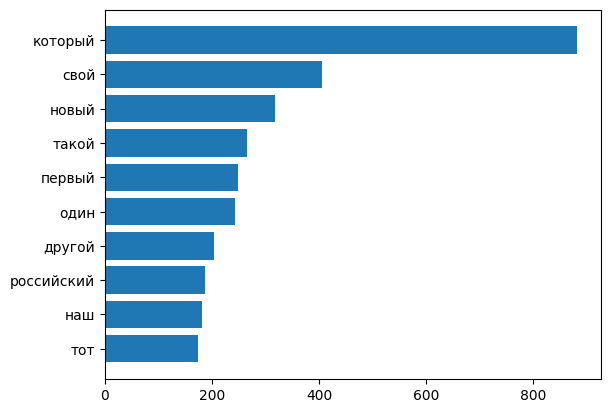

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

const_cnt = {}
for word in my_words_adj:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])
    plt.barh(range(len(n)), w, tick_label=n)
    plt.show()

word_graph(const_cnt, max_words=10)



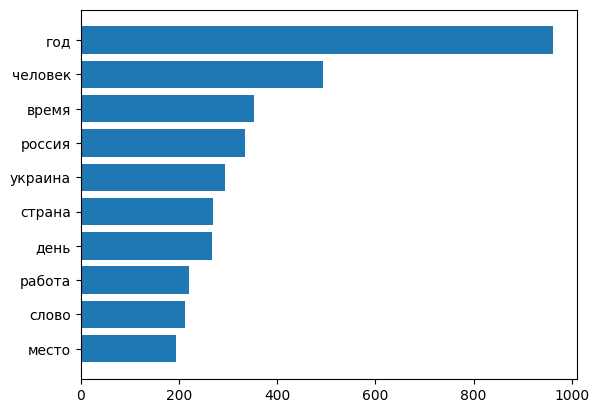

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

const_cnt = {}
for word in my_words_noun:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])
    plt.barh(range(len(n)), w, tick_label=n)
    plt.show()

word_graph(const_cnt, max_words=10)